# Guia 1
## Ejercicio 1
Escriba funciones que permitan generar las siguientes señales discretas:
1. Una senoidal que responda a la ecuación $y[n] = sen(2 \pi f_s t + \Phi)$, donde t es la variable de tiempo discreto, con paso $\frac{1}{f_m}$, $f_m$ es la frecuencia de muestre perteneciente a los reales, $f_s$ es la frecuencia de la senoidal y $\phi$ su fase.
2. Una señal sync, definida como
$$
sinc(x) = 
    \begin{cases}
        \frac{sin(x)}{x}    &\quad\text{si } x \neq 0 \\
        1                   &\quad\text{si } x = 0 \\
    \end{cases}
$$
considerando $x = 2 \pi f_st$, con $f_s \in \mathbb{R}$ y $t \in (-1,1)$\
3. Una onda cuadrada, que puede definirse de la siguiente manera
$$
c(x) = 
    \begin{cases}
        -1      &\quad\text{si } mod(2 \pi f_s t + \Phi, 2 \pi) \geq \pi \\
        1       &\quad\text{si } mod(2 \pi f_s t + \Phi, 2 \pi) < \pi \\
    \end{cases}
$$
$c(t) = -1$ si $mod(2 \pi f_s t + \Phi, 2 \pi) \geq \pi$
$c(t) = 1$ si $mod(2 \pi f_s t + \Phi, 2 \pi) < \pi$

Las tres funciones deben permitir elegir el intervalo de tiempo que se desea muestrear, definido desde $t_inicial$ a $t_final$. Una vez generadas estas funciones, pruebelas utilizando una frecuencia de meustre de 100Hz, un intervalo de tiempo [0,1] y distintos valores para la $f_s$, y la fase $\Phi$. Respete la relacion $2 f_s \leq f_m$ para determinar los valores de las frecuencias.


> ### Nota
> `arange(Tini,Tfin,T)` genera muestra a partir del intervalo y periodo e infiere el numero de muestras. \
> `linspace(Tini, Tfin, n, endpoint=False)` genera muestras a partir del intervalo y el numero de muestras e infiere el periodo. Tiene menos problemas de presicion que > `arange` y usamos `endpoint=False` para excluir `Tfin` de las muestras.

In [1]:
import numpy as np

''' Ejercicio 1.1
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def senoidal(tini, tfin, fm, fs, fase):
    # muestras
    t = np.linspace(tini,tfin,fm * (tfin - tini), endpoint=False)
    # valores
    return t, np.sin(2 * np.pi * fs * t + fase)

''' Ejercicio 1.2
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def sinc(tini, tfin, fm, fs, fase):
    # muestras
    t = np.linspace(tini, tfin, fm * (tfin - tini), endpoint=False)
    # precalcular angulos
    x = 2 * np.pi * fs * t + fase
    # retornar valores condicionados por x = 0 => 1
    return t, np.where(np.equal(x, [0]*len(x)), 1, np.sin(x) / x)

''' Ejercicio 1.3
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def cuadrada(tini, tfin, fm, fs, fase):
    # muestras
    t = np.linspace(tini, tfin, fm * (tfin-tini), endpoint=False)
    # precalcular modulos 2 * np.pi * fs * t + fase%(2pi)
    val = np.mod(2 * np.pi * fs * t + fase, 2 * np.pi)
    # retornar valores condicionados mod >= pi -> -1 
    return t, np.where(np.greater_equal(val, np.pi), -1, 1)

### Test

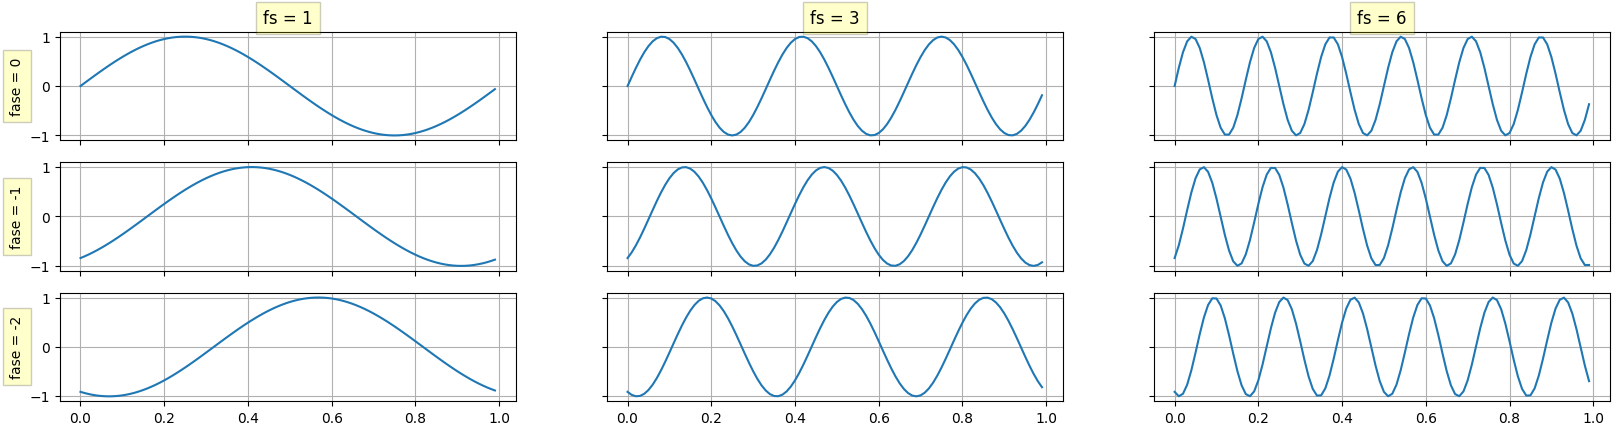

In [2]:
import matplotlib.pyplot as plt

[t00,s00] = senoidal(0,1,100,1,0)
[t01,s01] = senoidal(0,1,100,1,-1)
[t02,s02] = senoidal(0,1,100,1,-2)

[t10,s10] = senoidal(0,1,100,3,0)
[t11,s11] = senoidal(0,1,100,3,-1)
[t12,s12] = senoidal(0,1,100,3,-2)

[t20,s20] = senoidal(0,1,100,6,0)
[t21,s21] = senoidal(0,1,100,6,-1)
[t22,s22] = senoidal(0,1,100,6,-2)

box = dict(facecolor='yellow', pad=5, alpha=0.2)
fig,ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.set_figwidth(20)
ax[0,0].grid()
ax[0,0].set_title('fs = 1', bbox=box)
ax[0,0].set_ylabel('fase = 0', bbox=box)

ax[1,0].grid()
ax[1,0].set_ylabel('fase = -1', bbox=box)

ax[2,0].grid()
ax[2,0].set_ylabel('fase = -2', bbox=box)

ax[0,1].grid()
ax[0,1].set_title('fs = 3', bbox=box)

ax[1,1].grid()
ax[2,1].grid()

ax[0,2].grid()
ax[0,2].set_title('fs = 6', bbox=box)

ax[1,2].grid()
ax[2,2].grid()

ax[0,0].plot(t00,s00)
ax[1,0].plot(t01,s01)
ax[2,0].plot(t02,s02)
ax[0,1].plot(t10,s10)
ax[1,1].plot(t11,s11)
ax[2,1].plot(t12,s12)
ax[0,2].plot(t20,s20)
ax[1,2].plot(t21,s21)
ax[2,2].plot(t22,s22)

plt.show()

/tmp/ipykernel_48666/2779178673.py:29: RuntimeWarning: invalid value encountered in divide
  return t, np.where(np.equal(x, [0]*len(x)), 1, np.sin(x) / x)


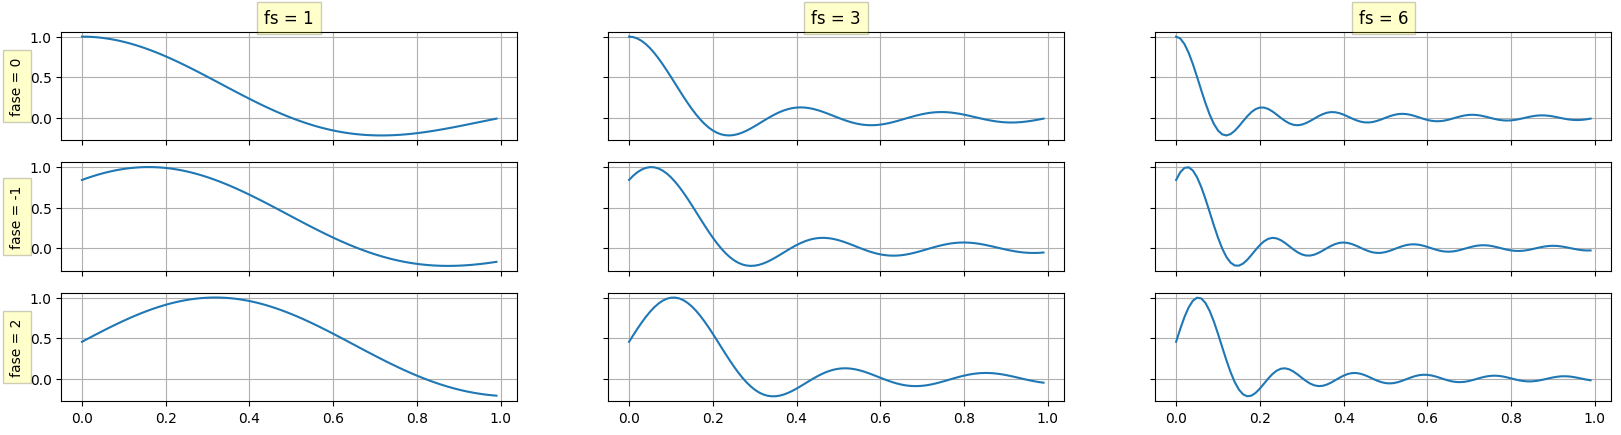

In [3]:
import matplotlib.pyplot as plt

[t00,s00] = sinc(0,1,100,1,0)
[t01,s01] = sinc(0,1,100,1,-1)
[t02,s02] = sinc(0,1,100,1,-2)

[t10,s10] = sinc(0,1,100,3,0)
[t11,s11] = sinc(0,1,100,3,-1)
[t12,s12] = sinc(0,1,100,3,-2)

[t20,s20] = sinc(0,1,100,6,0)
[t21,s21] = sinc(0,1,100,6,-1)
[t22,s22] = sinc(0,1,100,6,-2)

box = dict(facecolor='yellow', pad=5, alpha=0.2)
fig,ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.set_figwidth(20)
ax[0,0].grid()
ax[0,0].set_title('fs = 1', bbox=box)
ax[0,0].set_ylabel('fase = 0', bbox=box)

ax[1,0].grid()
ax[1,0].set_ylabel('fase = -1', bbox=box)

ax[2,0].grid()
ax[2,0].set_ylabel('fase = 2', bbox=box)

ax[0,1].grid()
ax[0,1].set_title('fs = 3', bbox=box)

ax[1,1].grid()
ax[2,1].grid()

ax[0,2].grid()
ax[0,2].set_title('fs = 6', bbox=box)

ax[1,2].grid()
ax[2,2].grid()

ax[0,0].plot(t00,s00)
ax[1,0].plot(t01,s01)
ax[2,0].plot(t02,s02)
ax[0,1].plot(t10,s10)
ax[1,1].plot(t11,s11)
ax[2,1].plot(t12,s12)
ax[0,2].plot(t20,s20)
ax[1,2].plot(t21,s21)
ax[2,2].plot(t22,s22)

plt.show()

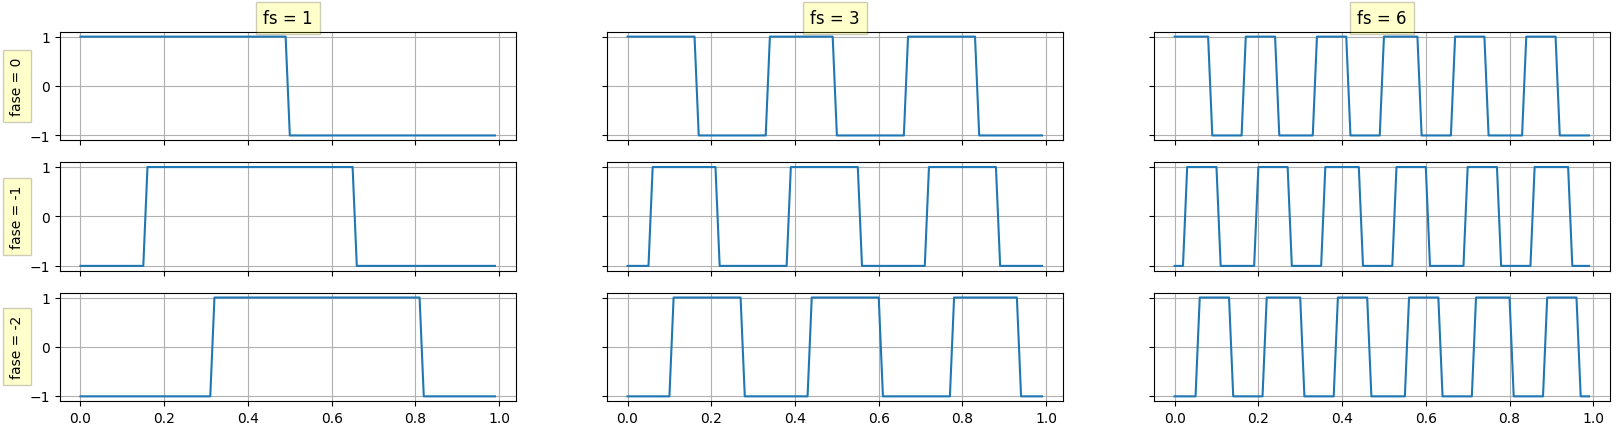

In [4]:
import matplotlib.pyplot as plt

[t00,s00] = cuadrada(0,1,100,1,0)
[t01,s01] = cuadrada(0,1,100,1,-1)
[t02,s02] = cuadrada(0,1,100,1,-2)

[t10,s10] = cuadrada(0,1,100,3,0)
[t11,s11] = cuadrada(0,1,100,3,-1)
[t12,s12] = cuadrada(0,1,100,3,-2)

[t20,s20] = cuadrada(0,1,100,6,0)
[t21,s21] = cuadrada(0,1,100,6,-1)
[t22,s22] = cuadrada(0,1,100,6,-2)

box = dict(facecolor='yellow', pad=5, alpha=0.2)
fig,ax = plt.subplots(3,3,sharex=True,sharey=True)
fig.set_figwidth(20)
ax[0,0].grid()
ax[0,0].set_title('fs = 1', bbox=box)
ax[0,0].set_ylabel('fase = 0', bbox=box)

ax[1,0].grid()
ax[1,0].set_ylabel('fase = -1', bbox=box)

ax[2,0].grid()
ax[2,0].set_ylabel('fase = -2', bbox=box)

ax[0,1].grid()
ax[0,1].set_title('fs = 3', bbox=box)

ax[1,1].grid()
ax[2,1].grid()

ax[0,2].grid()
ax[0,2].set_title('fs = 6', bbox=box)

ax[1,2].grid()
ax[2,2].grid()

ax[0,0].plot(t00,s00)
ax[1,0].plot(t01,s01)
ax[2,0].plot(t02,s02)
ax[0,1].plot(t10,s10)
ax[1,1].plot(t11,s11)
ax[2,1].plot(t12,s12)
ax[0,2].plot(t20,s20)
ax[1,2].plot(t21,s21)
ax[2,2].plot(t22,s22)

plt.show()